## **Iniciamos con la importación de librerías a utilizar**

In [3]:
#Importamos las librerías necesarias
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [4]:
# Importamos la data
data = pd.read_csv('/content/BASE.csv', encoding='ISO-8859-1', sep=';')

# Mostramos las primeras filas para verificar la estructura.
data.head()


,lugar_presenta,proceso,genero,colegio,prof_padre,prof_madre,calificacion_carpeta,meritos,inteligencia,promedio_acad,aptitud_med,ppff,visita_dom,calificacion,apto
0,UIO,OFICIAL DE ARMA,MASCULINO,COLEGIO MILITAR TENIENTE HUGO ORTIZ,MECANICO,INGENIERA,86.1,1.01,119.0,16.45,APTO CON CONDICION,APROBADO,APROBADO,12.88,1
1,GYE,OFICIAL DE ARMA,MASCULINO,LICEO NAVAL DE GUAYAQUIL,MILITAR,ODONTÓLOGA,78.0,0.20,130.0,16.25,APTO,APROBADO,APROBADO,11.91,1
2,GYE,OFICIAL DE ARMA,MASCULINO,LICEO NAVAL DE GUAYAQUIL,MILITAR,Master en psicología educativa,78.0,0.20,131.0,16.05,APTO CON CONDICION,APROBADO,APROBADO,11.88,1
3,GYE,OFICIAL DE ARMA,FEMENINO,LICEO NAVAL DE GUAYAQUIL,ECONOMISTA,ECONOMISTA,80.0,0.20,130.0,16.20,APTO CON CONDICION,APROBADO,APROBADO,11.67,1
4,GYE,OFICIAL DE ARMA,MASCULINO,UNIDAD EDUCATIVA EUGENIO ESPEJO,MILITAR,BACHILLER,58.0,0.00,109.0,15.25,APTO,APROBADO,APROBADO,11.63,1


In [5]:
# Convertimos a variables categóricas
data['lugar_presenta'] = data['lugar_presenta'].astype('object')
data['proceso'] = data['proceso'].astype('object')
data['genero'] = data['genero'].astype('object')
data['colegio'] = data['colegio'].astype('object')
data['prof_padre'] = data['prof_padre'].astype('object')
data['prof_madre'] = data['prof_madre'].astype('object')
data['aptitud_med'] = data['aptitud_med'].astype('object')
data['ppff'] = data['ppff'].astype('object')
data['visita_dom'] = data['visita_dom'].astype('object')



## Agoritmo utilizando **XGBoost**

In [6]:
#Preparamos la data
# Separamos características (X) y variable objetivo (y)
X = data[['lugar_presenta','proceso','genero','colegio','prof_padre','prof_madre','calificacion_carpeta','meritos','inteligencia','promedio_acad','aptitud_med','ppff','visita_dom','calificacion']]
y = data['apto']

# Convertimos variable 'apto' a formato numérico
y = y.astype(int)

# Codificamos las variables categóricas
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<ipython-input-6-8d0bfe456565>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
<ipython-input-6-8d0bfe456565>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
<ipython-input-6-8d0bfe456565>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [7]:
# Crea una DMatrix para XGBoost (estructura de datos optimizada)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Establece los parámetros de XGBoost
param = {
    'objective': 'binary:logistic',  # For binary classification
    'eval_metric': 'logloss',
    'max_depth': 3,
    'eta': 0.1
}

# Entrenamos el modelo
num_round = 100  # Número de rondas de boosting
model = xgb.train(param, dtrain, num_round)

In [8]:
# Predice sobre el conjunto de prueba
y_pred = model.predict(dtest)
y_pred_binary = [round(value) for value in y_pred]  # Convert probabilities to binary predictions

# Evalúa la precisión
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

Accuracy: 0.948051948051948


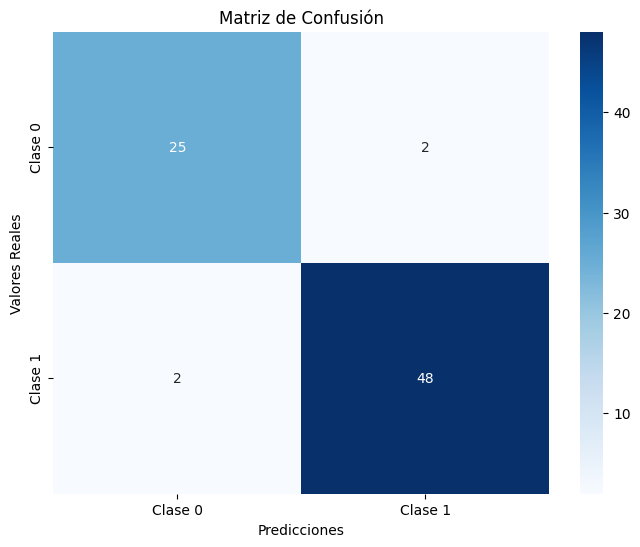

In [9]:
#Construimos una matriz de confusión

#Importamos las librerías a utilizar
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calclamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred_binary)

# Creamos un gráfico para mejor visualización
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Clase 0", "Clase 1"],
            yticklabels=["Clase 0", "Clase 1"])
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.title("Matriz de Confusión")
plt.show()